<a href="https://colab.research.google.com/github/ilyandho/FPL-Optimal-Transfer/blob/main/FPL_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch and extract important attributes from FPL API
 Store the data to *`player_data.csv`*

In [ ]:
import requests, json
import pandas as pd

base_url = 'https://fantasy.premierleague.com/api/'

def get_player_data(gw):
  player_history = []
  for gwk in range(1,gw+1):
    r = requests.get(base_url + 'event/' + str(gwk) + '/live/').json()

    for player in r['elements']:
      fixture = requests.get(base_url + 'fixtures?event='+ str(gwk)).json()
      team_h_difficulty = 0
      team_a_difficulty = 0
      for i in fixture:
        if i['id']== player['id']:
          team_h_difficulty = i['team_h_difficulty']
          team_a_difficulty = i['team_a_difficulty']
      temp_data = {'id': int(player['id']), 'gw':gwk,'team_h_difficulty': team_h_difficulty, 'team_a_difficulty':team_a_difficulty}
      for key in player['stats'].keys():

        temp_data.update({key: player['stats'][key]})

      player_history.append(temp_data)
  return player_history




player_data = pd.DataFrame(get_player_data(30))

player_data

with pd.ExcelWriter("/content/player_data.xlsx", mode="w") as writer:
    player_data.to_excel(writer, sheet_name="GW21")


In [ ]:
player_data.columns


Index(['id', 'gw', 'team_h_difficulty', 'team_a_difficulty', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points',
       'in_dreamteam'],
      dtype='object')

In [ ]:
# Store data to csv
player_data.to_csv('/content/player_data.csv', encoding = 'utf-8-sig')

## Fetch stored player data in csv

In [2]:
import pandas as pd

df = pd.read_excel('/content/player_data.xlsx')
df.head()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
0,0,1,1,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
1,1,2,1,2,5,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
2,2,3,1,2,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
3,3,4,1,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
4,4,5,1,2,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.02,1,False


In [3]:
df.describe()

,Unnamed: 0,id,gw,team_h_difficulty,team_a_difficulty,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
count,22838.00000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,...,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000
mean,11418.50000,383.021806,16.069884,0.033847,0.039145,25.265216,0.039977,0.036124,0.063053,0.457089,...,5.991208,4.052855,3.798713,1.383619,0.282249,0.040455,0.025396,0.065842,0.443002,1.046677
std,6592.90706,222.936607,8.636192,0.316168,0.365991,38.149475,0.217718,0.205797,0.243063,0.955998,...,12.369450,10.516684,10.739667,2.793724,0.456959,0.150496,0.083918,0.192029,0.813138,2.287807
min,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,5709.25000,191.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11418.50000,381.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17127.75000,571.000000,24.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,6.400000,1.200000,0.000000,1.800000,1.000000,0.000000,0.010000,0.010000,0.630000,1.000000
max,22837.00000,843.000000,30.000000,5.000000,5.000000,180.000000,3.000000,4.000000,1.000000,8.000000,...,130.000000,181.800000,142.000000,27.400000,2.000000,2.770000,1.470000,3.880000,7.820000,23.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22838 non-null  int64  
 1   id                          22838 non-null  int64  
 2   gw                          22838 non-null  int64  
 3   team_h_difficulty           22838 non-null  int64  
 4   team_a_difficulty           22838 non-null  int64  
 5   minutes                     22838 non-null  int64  
 6   goals_scored                22838 non-null  int64  
 7   assists                     22838 non-null  int64  
 8   clean_sheets                22838 non-null  int64  
 9   goals_conceded              22838 non-null  int64  
 10  own_goals                   22838 non-null  int64  
 11  penalties_saved             22838 non-null  int64  
 12  penalties_missed            22838 non-null  int64  
 13  yellow_cards                228

In [5]:
df.isnull().sum()

Unnamed: 0                    0
id                            0
gw                            0
team_h_difficulty             0
team_a_difficulty             0
minutes                       0
goals_scored                  0
assists                       0
clean_sheets                  0
goals_conceded                0
own_goals                     0
penalties_saved               0
penalties_missed              0
yellow_cards                  0
red_cards                     0
saves                         0
bonus                         0
bps                           0
influence                     0
creativity                    0
threat                        0
ict_index                     0
starts                        0
expected_goals                0
expected_assists              0
expected_goal_involvements    0
expected_goals_conceded       0
total_points                  0
in_dreamteam                  0
dtype: int64

In [6]:
df.columns
df['creativity'].describe()

count    22838.000000
mean         4.052855
std         10.516684
min          0.000000
25%          0.000000
50%          0.000000
75%          1.200000
max        181.800000
Name: creativity, dtype: float64

In [7]:
attributes = ['team_h_difficulty', 'team_a_difficulty', 'creativity',
       'threat', 'ict_index', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
players_data = df[attributes]
players_data

,team_h_difficulty,team_a_difficulty,creativity,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
3,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
4,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.02,1
...,...,...,...,...,...,...,...,...,...,...
22833,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
22834,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
22835,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
22836,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0


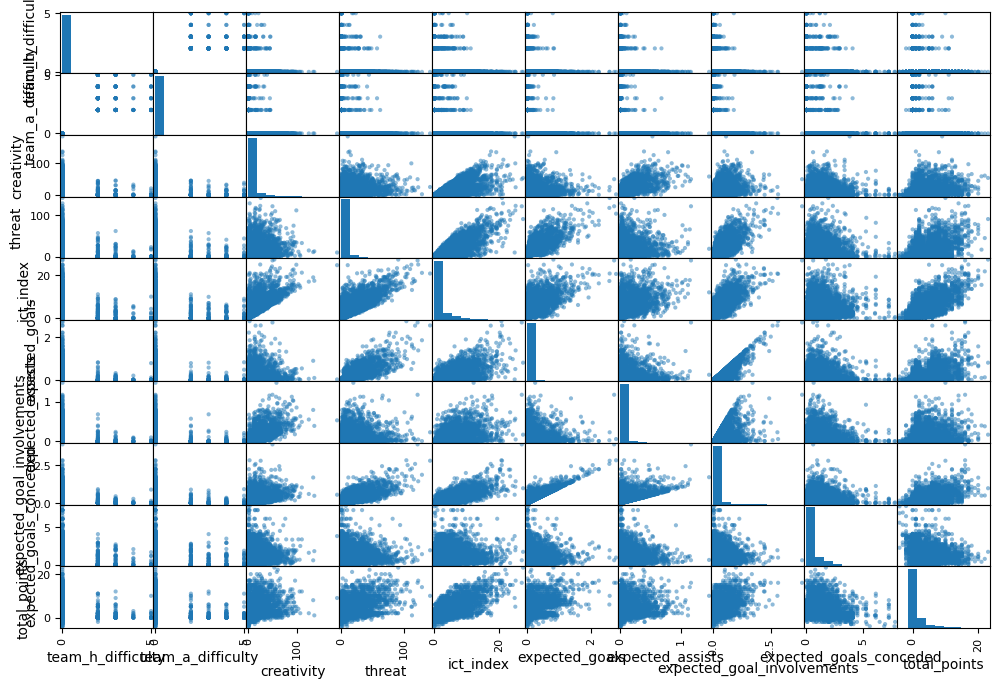

In [8]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

scatter_matrix(players_data[attributes], figsize=(12, 8))

plt.show()

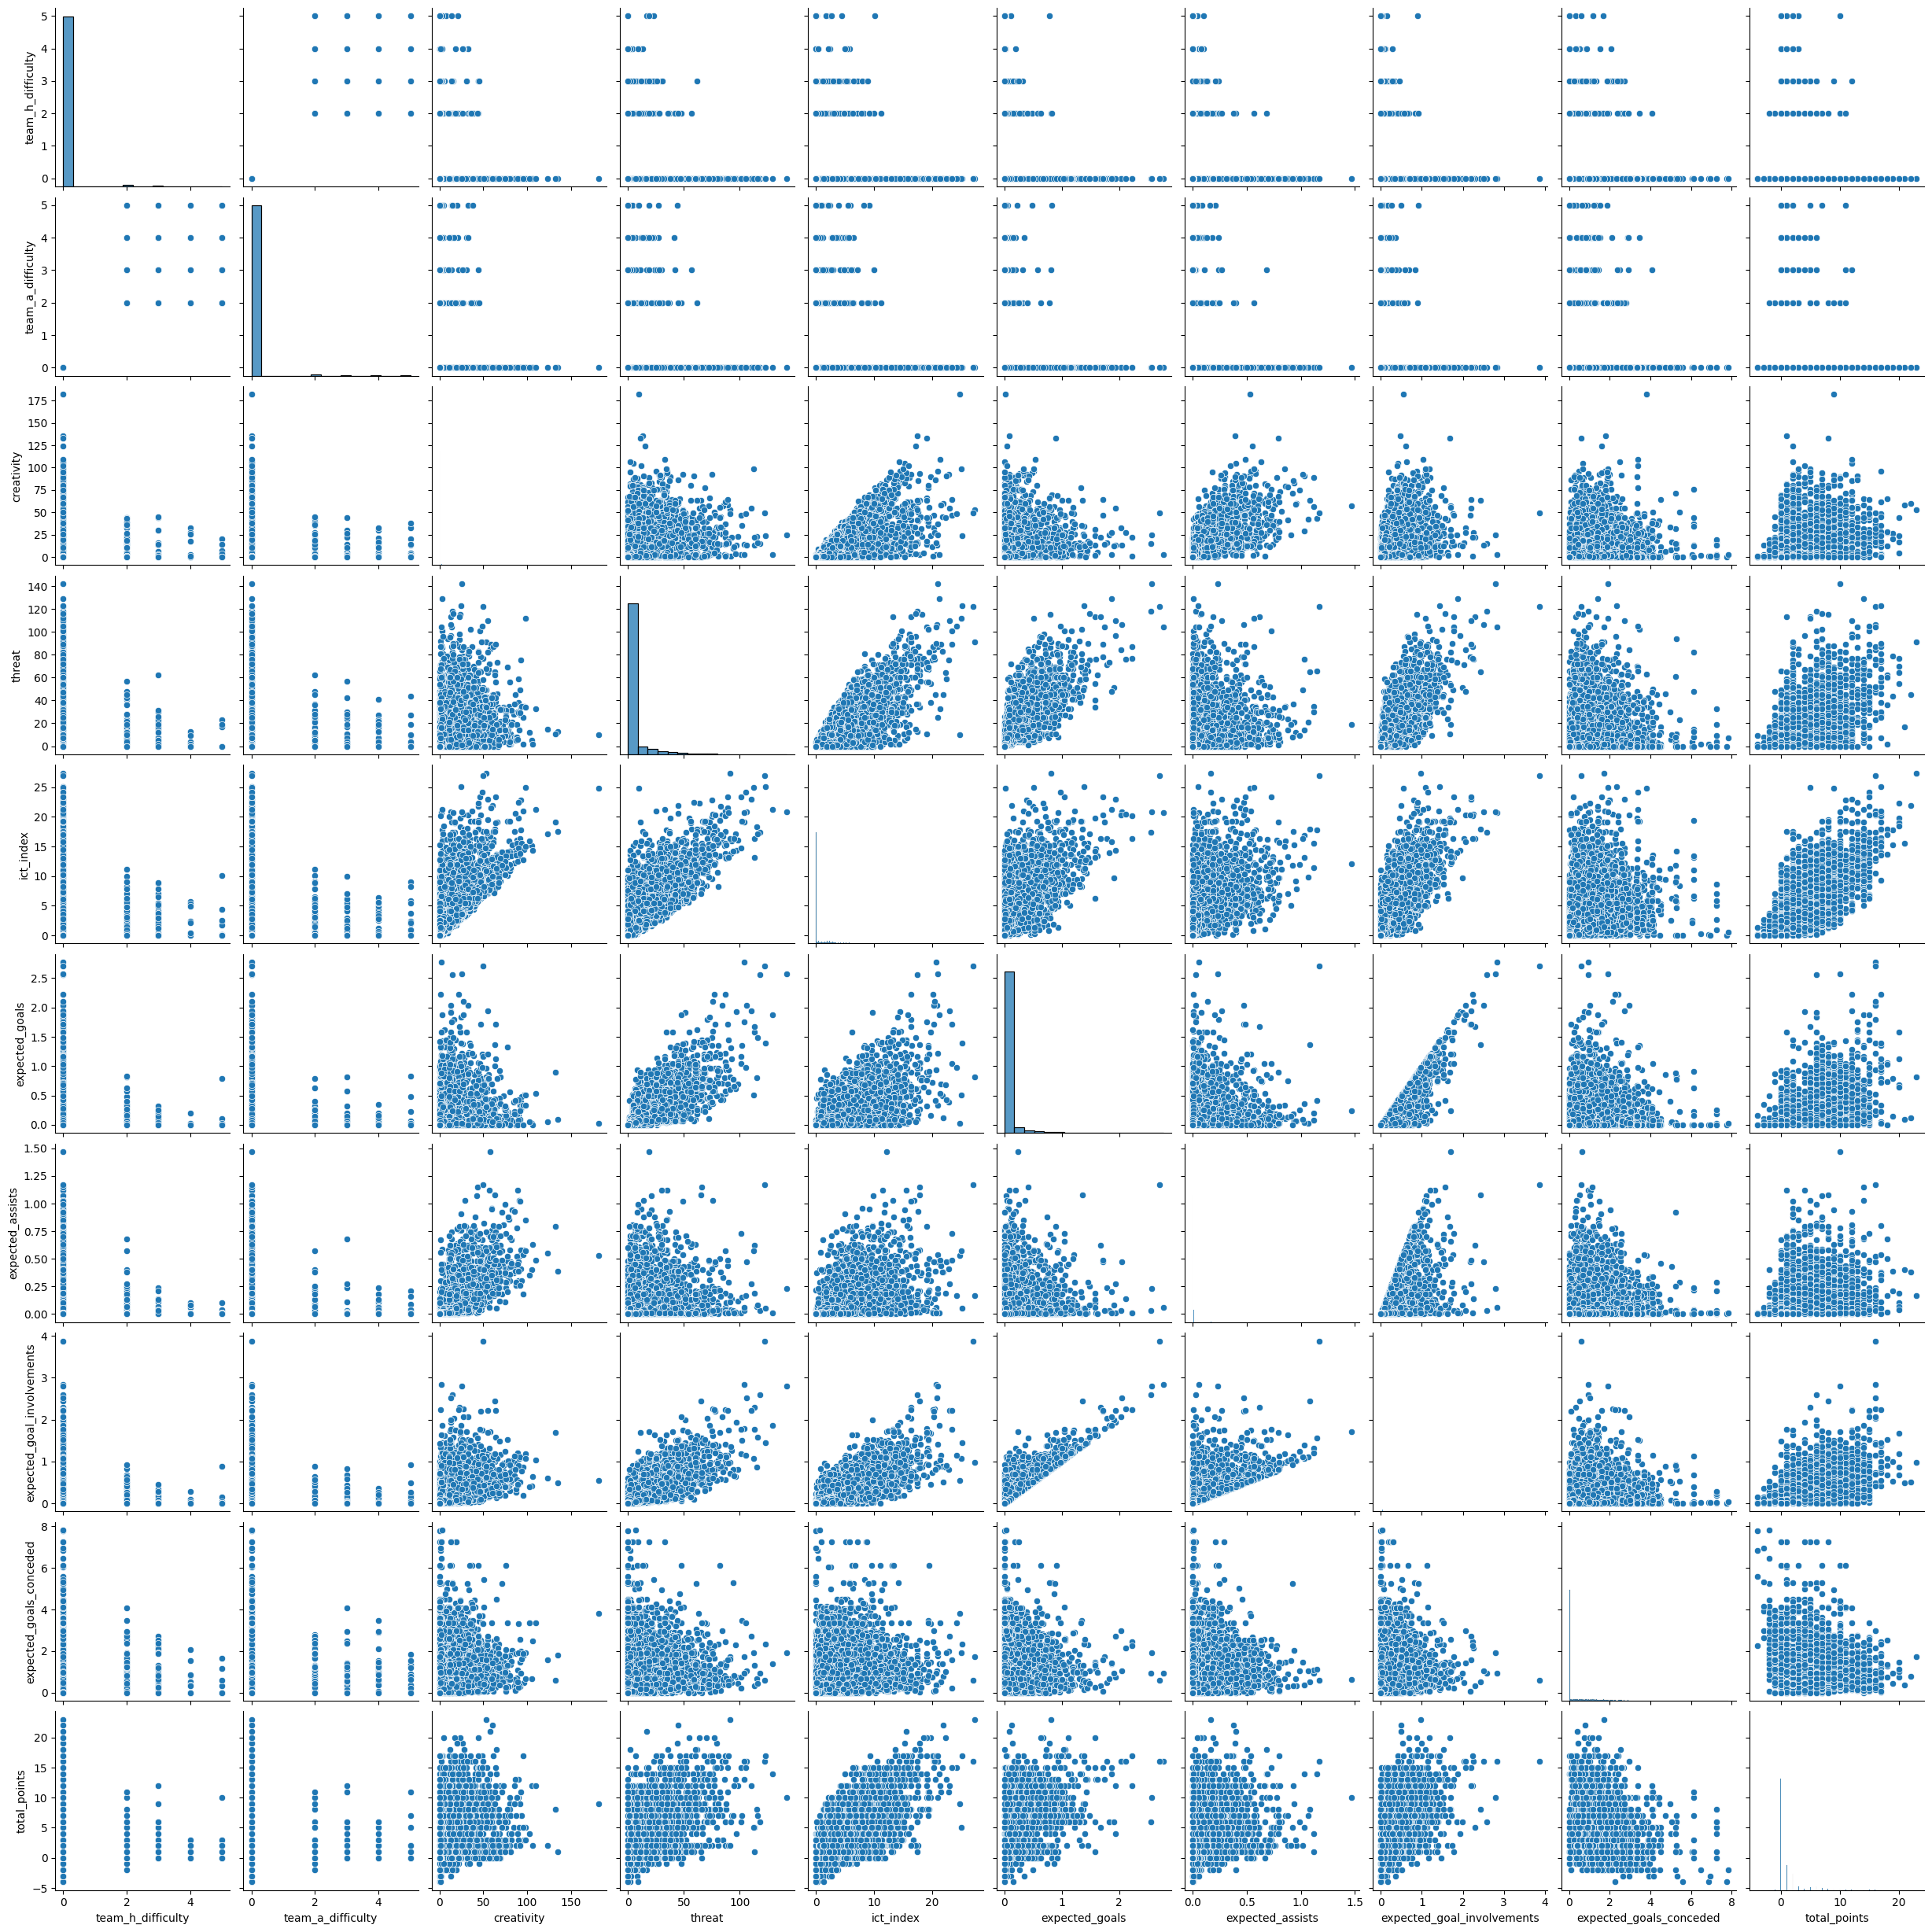

In [9]:
import seaborn as sns
sns.pairplot(players_data.loc[:,attributes])

In [10]:
from sklearn.model_selection import train_test_split
player_target = players_data['total_points']
player_features = players_data.drop("total_points", axis=1)

features_train, features_test, target_train, target_test = train_test_split(player_features, player_target, test_size=0.2)




## Using ML Models to Predict Points in Fantasy Premier League

### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(features_train, target_train)


predictions = model.predict(features_test)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))

from sklearn.model_selection import cross_val_score
import pandas as pd

tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

Training set MSE: 1.3161882790906871
Test set MSE: 1.3405330384691887
Training set R2: 0.7501270046139926
Test set R2: 0.7371212401382015


count    10.000000
mean      1.148437
std       0.035786
min       1.083525
25%       1.133019
50%       1.141294
75%       1.166350
max       1.210837
dtype: float64

### DecisionTree

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = TransformedTargetRegressor(DecisionTreeRegressor(), transformer=StandardScaler())
model.fit(features_train, target_train)


predictions = model.predict(features_test)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

Training set MSE: 0.005493714958489945
Test set MSE: 2.4772599051244875
Training set R2: 0.9989570405433004
Test set R2: 0.5142089056916221


count    10.000000
mean      1.521866
std       0.055023
min       1.464860
25%       1.472147
50%       1.503321
75%       1.572198
max       1.610251
dtype: float64

### RandomForestRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state' : [18]
}

model = TransformedTargetRegressor(RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=8, criterion="squared_error", random_state=18), transformer=StandardScaler())
model.fit(features_train, target_train)


predictions = model.predict(features_test)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

train_MSE = mean_squared_error(target_train, pred_train)
test_MSE = mean_squared_error(target_test, pred_test)

R2_train = model.score(features_train, target_train)
R2_test = model.score(features_test, target_test)

print('Training set MSE: {}'.format(train_MSE))
print('Test set MSE: {}'.format(test_MSE))
print('Training set R2: {}'.format(R2_train))
print('Test set R2: {}'.format(R2_test))

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(model, features_train, target_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

Training set MSE: 1.114700533212408
Test set MSE: 1.4710686595281208
Training set R2: 0.7883786342599906
Test set R2: 0.7115231823529584


count    10.000000
mean      1.202657
std       0.050901
min       1.146008
25%       1.164831
50%       1.189361
75%       1.246682
max       1.288768
dtype: float64

## Fine Tunning the Models

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
RModel = RandomForestRegressor()
param_grid = {'n_estimators': [8,10,12,14,16,18,20]}
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state' : [18]
}

grid_search = GridSearchCV(RModel, grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(features_train, target_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 373, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300,
                                          400, 500],
                         'random_state': [18]},
             scoring='neg_root_mean_squared_error')

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
95,1.345435,0.273147,0.088986,0.014996,squared_error,8,sqrt,200,18,"{'criterion': 'squared_error', 'max_depth': 8,...",-1.207525,-1.264973,-1.167925,-1.213474,0.039843,1
106,1.133531,0.016042,0.068695,0.000719,squared_error,8,log2,200,18,"{'criterion': 'squared_error', 'max_depth': 8,...",-1.207525,-1.264973,-1.167925,-1.213474,0.039843,1
315,1.146705,0.018412,0.066784,0.001405,friedman_mse,8,sqrt,200,18,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",-1.207341,-1.265082,-1.168391,-1.213605,0.039722,3
326,1.344464,0.247323,0.090947,0.015785,friedman_mse,8,log2,200,18,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",-1.207341,-1.265082,-1.168391,-1.213605,0.039722,3
108,2.544550,0.381876,0.131167,0.002289,squared_error,8,log2,400,18,"{'criterion': 'squared_error', 'max_depth': 8,...",-1.205182,-1.266726,-1.169173,-1.213693,0.040278,5


In [1]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

### RadomGridSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators': randint(low=2, high=100)}
rnd_search = RandomizedSearchCV(
RModel, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(features_train,target_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x785fac28a050>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,1.616279,0.019411,0.050689,0.000296,84,{'n_estimators': 84},-1.104663,-1.154222,-1.120245,-1.126377,0.020692,1
7,1.954234,0.305285,0.062508,0.007862,88,{'n_estimators': 88},-1.104004,-1.159677,-1.120306,-1.127996,0.023370,2
1,1.834493,0.045203,0.058587,0.001315,94,{'n_estimators': 94},-1.109527,-1.155989,-1.122681,-1.129399,0.019554,3
3,1.609106,0.291973,0.054215,0.006763,73,{'n_estimators': 73},-1.099340,-1.154616,-1.135142,-1.129700,0.022892,4
0,1.310172,0.133300,0.040730,0.005468,53,{'n_estimators': 53},-1.112390,-1.156638,-1.121523,-1.130184,0.019074,5
